# Used Car Prices in Saudi Arabia

## Content

1. [Import the necessary libraries](#1.-Import-the-necessary-libraries)
2. [Data Definition and Displaying](#2.-Data-Definition-and-isplaying)
3. [Data Cleaning & Preprocessing](#3.-Data-Cleaning-&-Preprocessing)
4. [Feature Engineering & Selection](#4.-Feature-Engineering-&-Selection)
5. [Machine Learning Models](#5.-Machine-Learning-Models)

## 1. Import the necessary libraries

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 2. Data Definition and Displaying

In [2]:
df = pd.read_csv('used_cars.csv')

In [3]:
df.head()

,Brand,Model,Year,Color,Options,Fuel_Type,Gear_Type,Engine_Size,Mileage,Region,Price,Age
0,Genesis,G80,2018,Gray,Semi Full,Gas,Automatic,3.8,170000,Riyadh,500.0,5
1,Toyota,Yaris,2018,White,Standard,Gas,Automatic,1.5,100000,Riyadh,850.0,5
2,Mitsubishi,Attrage,2019,Gray,Standard,Gas,Automatic,1.2,41000,Jeddah,877.0,4
3,Kia,Rio,2019,Bronze,Standard,Gas,Automatic,1.4,55500,Arar,884.0,4
4,Toyota,Yaris,2019,White,Standard,Gas,Automatic,1.6,85000,Najran,950.0,4


In [4]:
df.shape

(7290, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7290 entries, 0 to 7289
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        7290 non-null   object 
 1   Model        7290 non-null   object 
 2   Year         7290 non-null   int64  
 3   Color        7290 non-null   object 
 4   Options      7290 non-null   object 
 5   Fuel_Type    7290 non-null   object 
 6   Gear_Type    7290 non-null   object 
 7   Engine_Size  7221 non-null   float64
 8   Mileage      7290 non-null   int64  
 9   Region       7290 non-null   object 
 10  Price        6982 non-null   float64
 11  Age          7290 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 683.6+ KB


In [6]:
df.describe()

,Year,Engine_Size,Mileage,Price,Age
count,7290.000000,7221.000000,7.290000e+03,6.982000e+03,7290.000000
mean,2015.596159,3.087786,1.305347e+05,9.139407e+04,7.403841
std,4.977065,1.449779,2.948147e+05,9.044401e+04,4.977065
min,1963.000000,1.000000,1.000000e+02,5.000000e+02,0.000000
25%,2014.000000,2.000000,4.267975e+04,3.950000e+04,4.000000
50%,2016.000000,2.700000,9.630250e+04,6.500000e+04,7.000000
75%,2019.000000,4.000000,1.726320e+05,1.100000e+05,9.000000
max,2023.000000,9.000000,2.000000e+07,1.300000e+06,60.000000


## 3. Data Cleaning & Preprocessing

In [7]:
# Missing values
df.isnull().sum()

Brand            0
Model            0
Year             0
Color            0
Options          0
Fuel_Type        0
Gear_Type        0
Engine_Size     69
Mileage          0
Region           0
Price          308
Age              0
dtype: int64

In [8]:
median_engine_sizes = df.groupby(['Brand', 'Model'])['Engine_Size'].median()
def fill_nulls_with_median(row):
    if pd.isnull(row['Engine_Size']):
        brand = row['Brand']
        model = row['Model']
        if (brand, model) in median_engine_sizes:
            return median_engine_sizes[(brand, model)]
    return row['Engine_Size']
df['Engine_Size'] = df.apply(fill_nulls_with_median, axis=1)

In [9]:
df.isnull().sum()

Brand            0
Model            0
Year             0
Color            0
Options          0
Fuel_Type        0
Gear_Type        0
Engine_Size      0
Mileage          0
Region           0
Price          308
Age              0
dtype: int64

In [10]:
df = df[df['Price'] >= 5000]
df

,Brand,Model,Year,Color,Options,Fuel_Type,Gear_Type,Engine_Size,Mileage,Region,Price,Age
93,Chevrolet,Optra,2007,White,Standard,Gas,Automatic,1.6,2000000,Riyadh,5000.0,16
94,Toyota,Cressida,1991,White,Full,Gas,Manual,2.4,100,Riyadh,5000.0,32
95,Ford,Victoria,1998,Green,Standard,Gas,Automatic,4.6,40000,Riyadh,5000.0,25
96,Mercury,Grand Marquis,1996,Green,Full,Gas,Automatic,4.6,500,Jeddah,5000.0,27
97,GMC,Suburban,1990,Black,Semi Full,Gas,Automatic,3.5,140000,Aseer,5000.0,33
...,...,...,...,...,...,...,...,...,...,...,...,...
6977,Range Rover,Range Rover,2022,White,Full,Gas,Automatic,5.0,739,Riyadh,950000.0,1
6978,Bentley,Continental,2020,Black,Full,Gas,Automatic,4.0,38000,Dammam,950000.0,3
6979,Mercedes,G,2021,Black,Full,Gas,Automatic,5.0,5000,Riyadh,1150000.0,2
6980,Mercedes,G,2022,Black,Full,Gas,Automatic,4.0,3756,Dammam,1220000.0,1


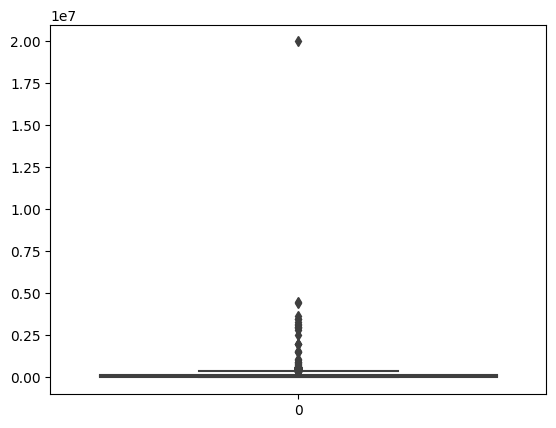

In [11]:
#Outliers
sns.boxplot(data=df['Mileage'].values);

In [12]:
def outlier_clean(dataframe, column):
    Q1 = np.percentile(column, 25, interpolation = 'midpoint')
    Q3 = np.percentile(column, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    lower = Q1 - 1.5*(IQR)
    higher = Q3 + 1.5*(IQR)
    print('lower bound outliers ', lower)
    print('higher bound outliers', higher)
    dataframe = dataframe.drop(dataframe[(column > higher) | (column < lower)].index, inplace=True)
outlier_clean(df, df['Mileage'])

lower bound outliers  -155000.0
higher bound outliers 373000.0


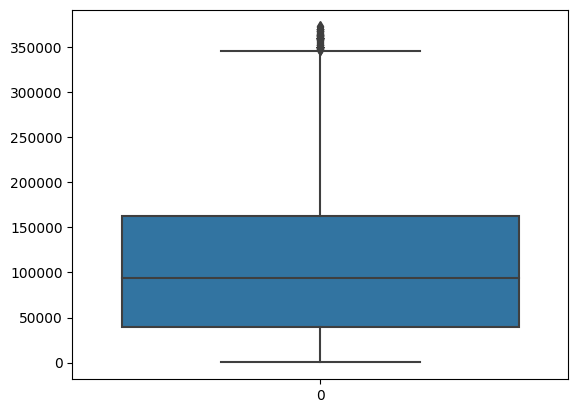

In [13]:
sns.boxplot(data=df['Mileage'].values);

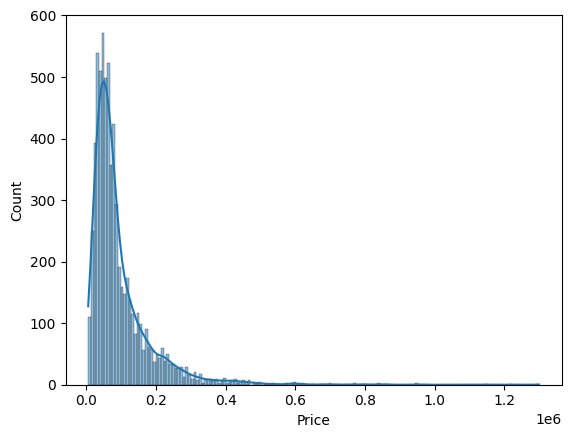

In [14]:
# Price distribution 
sns.histplot(df, x='Price',kde=True);

In [15]:
# Positive Sekewee handling 
df['Price'] = np.log(df['Price'])

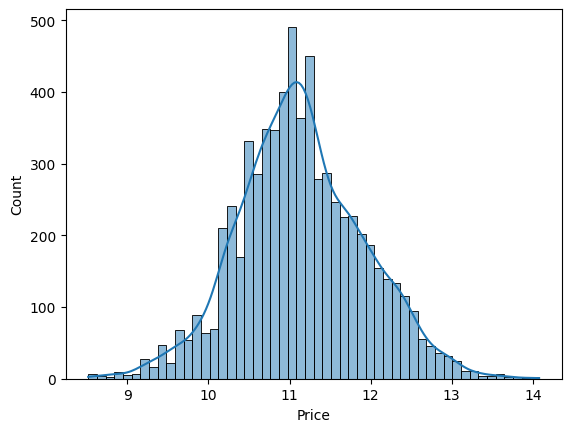

In [16]:
sns.histplot(df, x='Price',kde=True);

## 4. Feature Engineering & Selection 

In [17]:
le_df = df

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [19]:
# categorical data

# Encoding
le_df['Brand'] = le.fit_transform(le_df['Brand'])
le_df['Model'] = le.fit_transform(le_df['Model'])
le_df['Color'] = le.fit_transform(le_df['Color'])
le_df['Options'] = le.fit_transform(le_df['Options'])
le_df['Gear_Type'] = le.fit_transform(le_df['Gear_Type'])
le_df['Region'] = le.fit_transform(le_df['Region'])

In [20]:
#Numerical data 

# Normalisation  
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = le_df['Mileage'].values
le_df['Mileage'] = scaler.fit_transform(x.reshape(-1,1))

In [21]:
le_df

,Brand,Model,Year,Color,Options,Fuel_Type,Gear_Type,Engine_Size,Mileage,Region,Price,Age
94,56,127,1991,10,0,Gas,2,2.4,0.000000,24,8.517193,32
95,17,395,1998,6,3,Gas,0,4.6,0.106999,24,8.517193,25
96,43,212,1996,6,0,Gas,0,4.6,0.001073,14,8.517193,27
97,20,352,1990,1,2,Gas,0,3.5,0.375168,7,8.517193,33
99,27,36,2005,10,3,Gas,2,1.5,0.789761,9,8.517193,18
...,...,...,...,...,...,...,...,...,...,...,...,...
6977,50,319,2022,10,0,Gas,0,5.0,0.001714,24,13.764217,1
6978,5,116,2020,1,0,Gas,0,4.0,0.101636,9,13.764217,3
6979,42,184,2021,1,0,Gas,0,5.0,0.013140,24,13.955273,2
6980,42,184,2022,1,0,Gas,0,4.0,0.009804,9,14.014361,1


In [22]:
X = le_df.drop(['Price','Year','Fuel_Type', 'Gear_Type','Region'],axis=1)
y = le_df['Price']

## 5. Machine Learning Models

### 5.1 Linear Regression 

#### Split Data

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

#### Build & Train the Model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [25]:
lm.fit(X_train,y_train)

LinearRegression()

#### Test the Model

In [26]:
print(lm.intercept_) 

11.422636889384904


In [27]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df 

,Coefficient
Brand,0.006330
Model,0.000099
Color,-0.015506
Options,-0.149741
Engine_Size,0.215201
Mileage,-0.700596
Age,-0.086674


In [28]:
predictions = lm.predict(X_test)
predictions

array([10.67948759, 10.69432516, 10.56201603, ..., 11.19685945,
       10.92137241, 10.09006   ])

In [29]:
Real_Values = np.array(y_test)
Real_Values

array([10.16585182, 10.73639668, 10.27505111, ..., 10.62132735,
       10.20359214, 11.51292546])

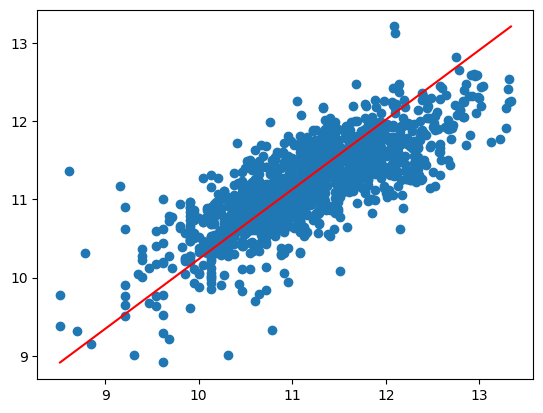

In [30]:
plt.scatter(Real_Values,predictions); 
plt.plot([min(Real_Values), max(Real_Values)],
         [min(predictions), max(predictions)], color='red');

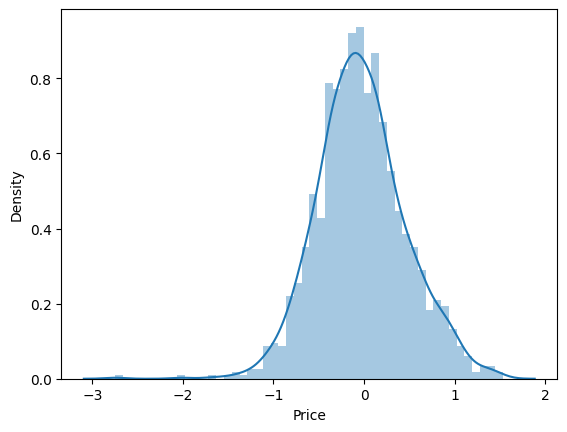

In [31]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution

#### Evaluate the Model

In [32]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', r2_score(y_test, predictions))

MAE: 0.3831126270153639
MSE: 0.24169451477012474
RMSE: 0.4916243634830609
R^2: 0.5963184690851945


### 5.2 Decision Tree Regression

#### Build & Train the Model

In [34]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(random_state = 40) 
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=40)

#### Test the Model

In [35]:
pred = regressor.predict(X_test)
pred

array([10.1266311 , 10.37349118, 10.25765937, ..., 12.32385568,
       10.74720759, 10.77895629])

In [36]:
Real_Values = np.array(y_test)
Real_Values

array([10.16585182, 10.73639668, 10.27505111, ..., 10.62132735,
       10.20359214, 11.51292546])

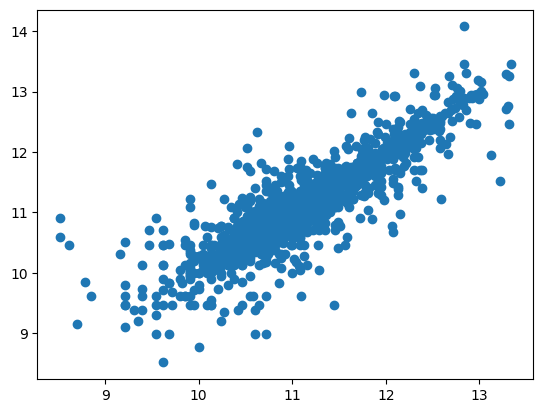

In [37]:
plt.scatter(Real_Values,pred); 


In [38]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(10,6))
# plot_tree(regressor, filled=True, feature_names=X.columns)
# plt.show()

#### Evaluate the Model

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', r2_score(y_test, predictions))

MAE: 0.3831126270153639
MSE: 0.24169451477012474
RMSE: 0.4916243634830609
R^2: 0.5963184690851945


### 5.3 Random Forest Regression 

#### Train the Model 

In [40]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

#### Test the Model

In [41]:
prediction = regressor.predict(X_test)
prediction

array([10.23713931, 10.6994992 , 10.25577206, ..., 10.96223757,
       10.67801521, 10.86445308])

In [42]:
Real_Values = np.array(y_test)
Real_Values

array([10.16585182, 10.73639668, 10.27505111, ..., 10.62132735,
       10.20359214, 11.51292546])

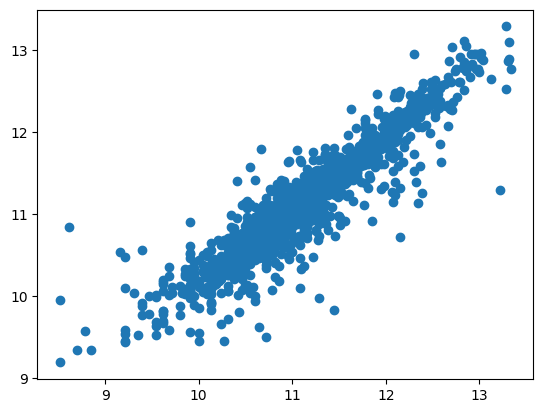

In [43]:
plt.scatter(Real_Values,prediction); 

## Compare Real Values vs Predictions on each model

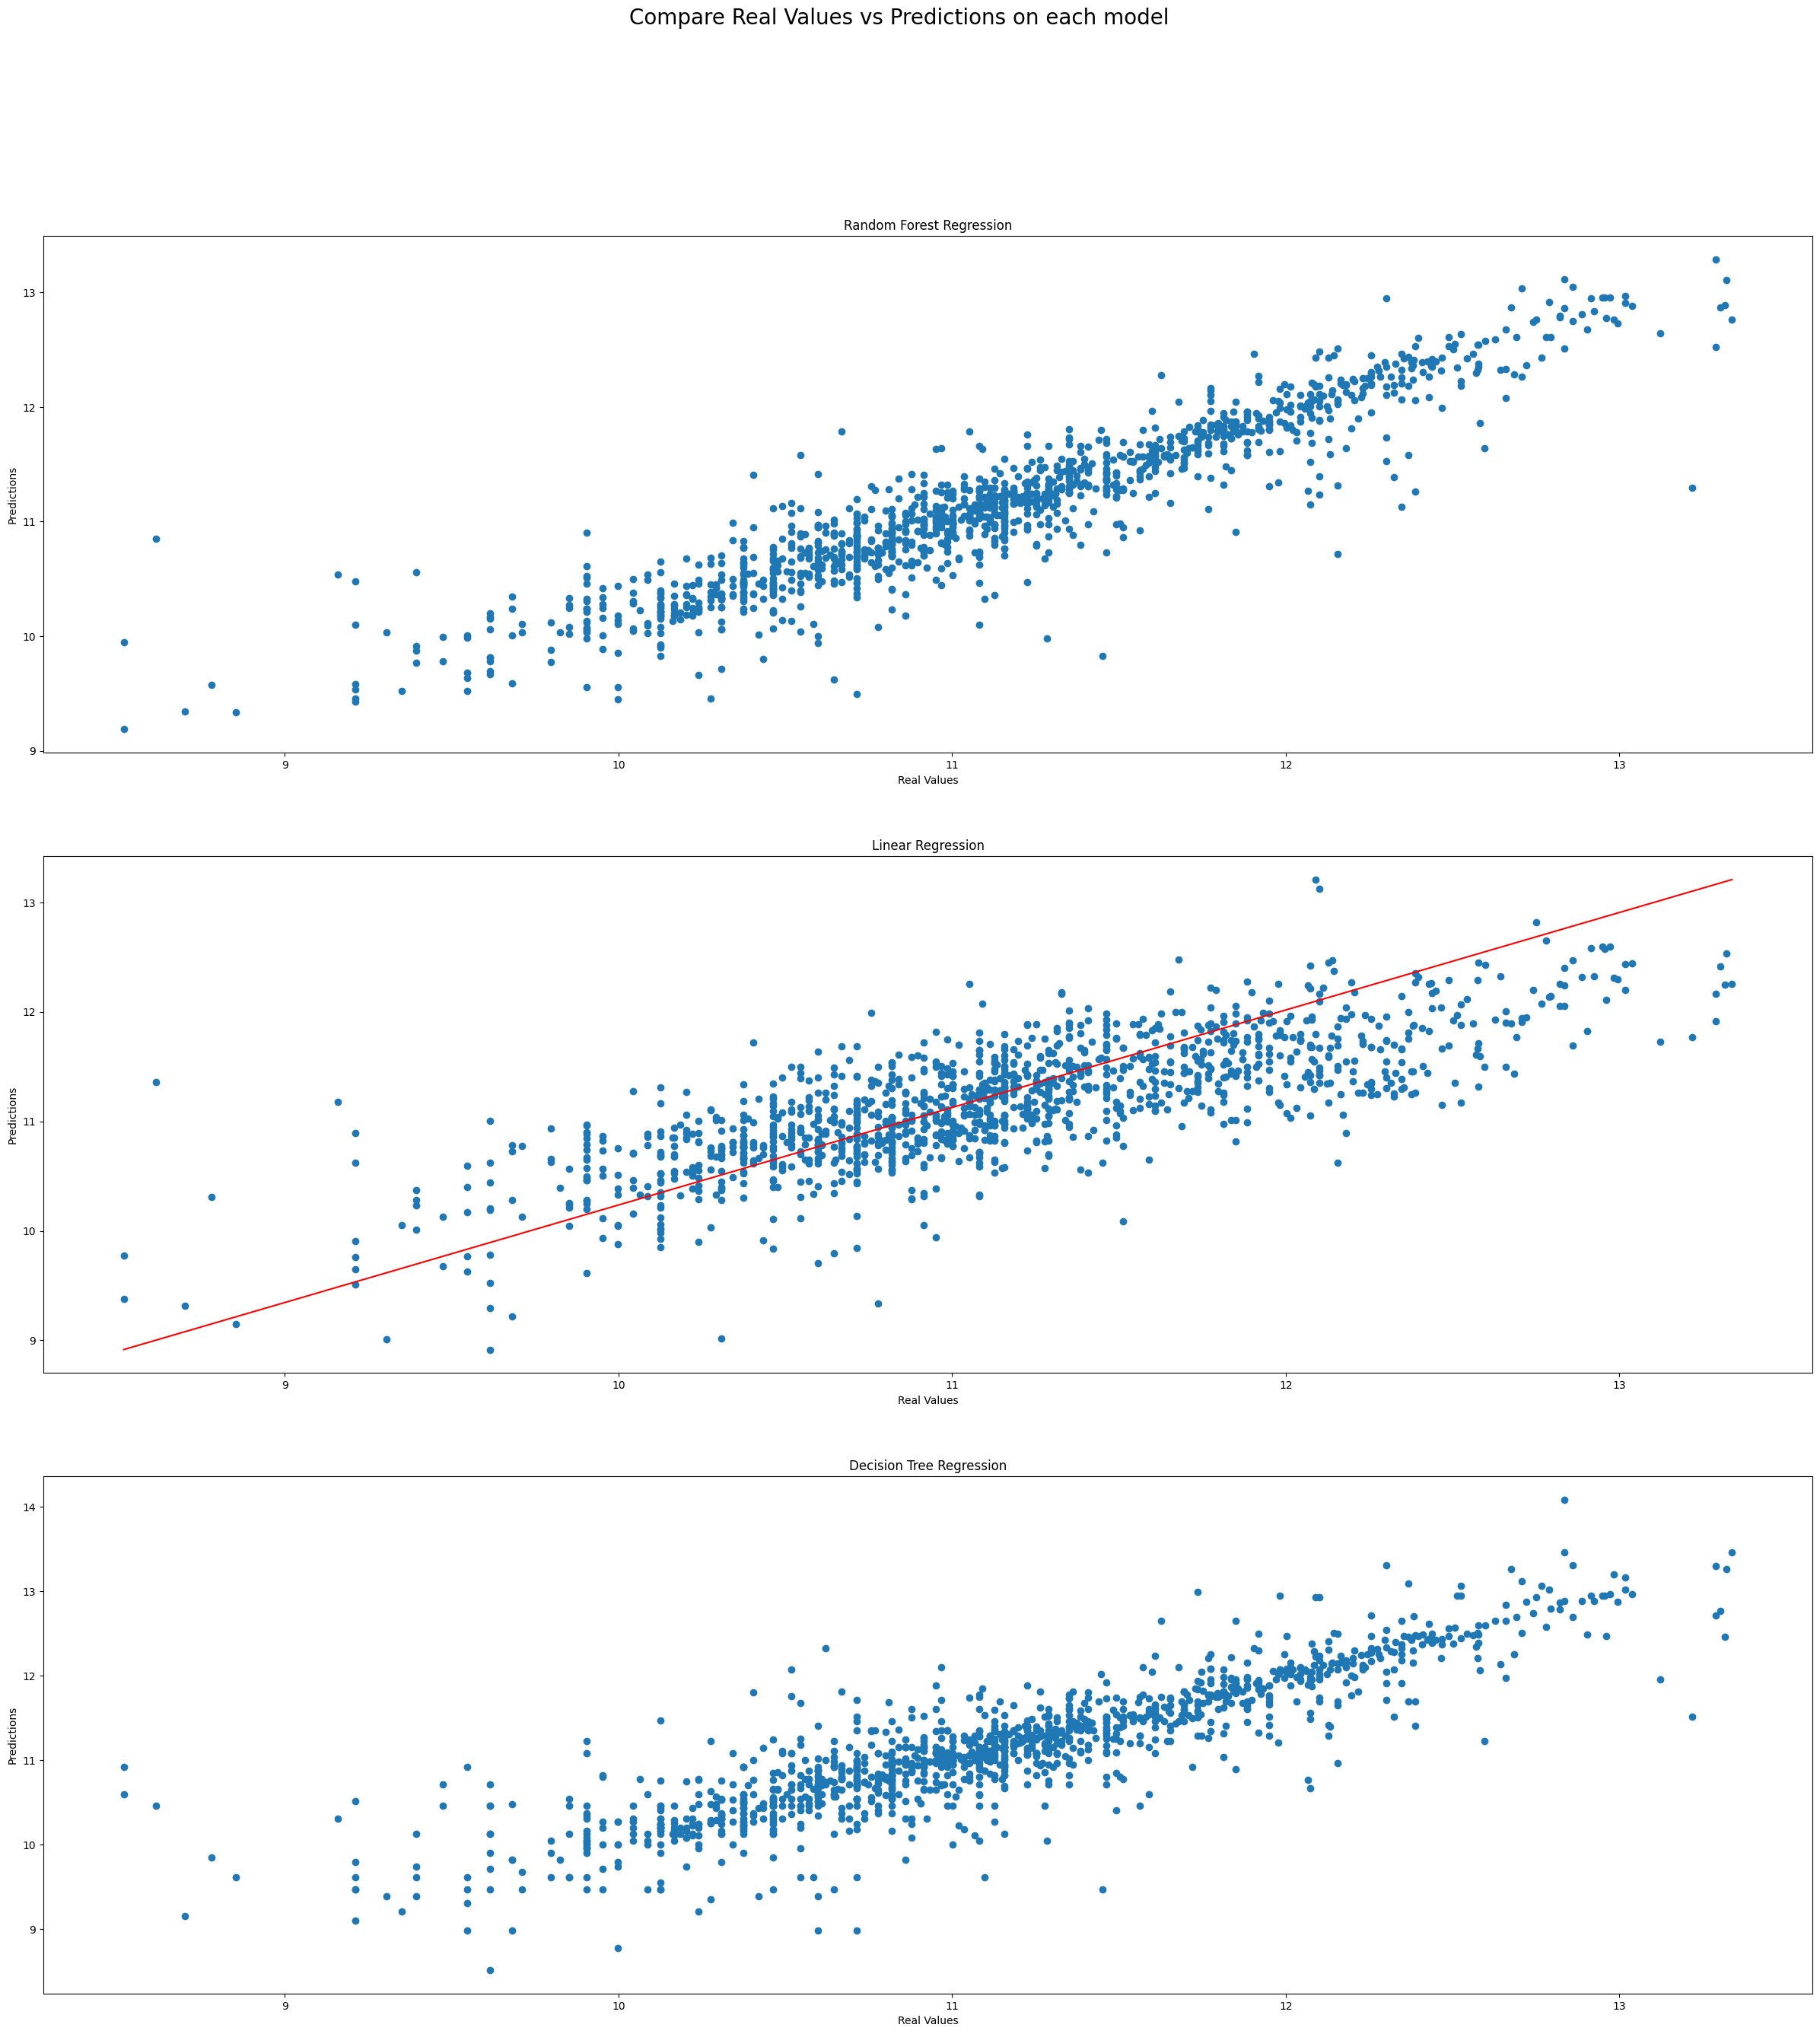

In [51]:
plt.figure(figsize=[30,30])

#first
plt.subplot(3,1,1) 
plt.scatter(Real_Values, prediction)
plt.title('Random Forest Regression')
plt.xlabel('Real Values')
plt.ylabel('Predictions')

#second
plt.subplot(3,1,2)
plt.scatter(Real_Values,predictions); 
plt.plot([min(Real_Values), max(Real_Values)],
         [min(predictions), max(predictions)], color='red');
plt.title('Linear Regression')
plt.xlabel('Real Values')
plt.ylabel('Predictions')


#third
plt.subplot(3,1,3)
plt.scatter(Real_Values,pred); 
plt.title('Decision Tree Regression')
plt.xlabel('Real Values')
plt.ylabel('Predictions')







plt.suptitle('Compare Real Values vs Predictions on each model',fontsize = 20);



In [ ]:
# from sklearn import tree
# first_tree = regressor.estimators_[0]
# #Plot the decision tree
# fig, ax = plt.subplots(figsize=(8, 6))
# tree.plot_tree(first_tree, ax=ax)
# plt.show()

#### Evaluate the Model

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', r2_score(y_test, predictions))

MAE: 0.3831126270153639
MSE: 0.24169451477012474
RMSE: 0.4916243634830609
R^2: 0.5963184690851945
